# Curva 01: Grado del Polinomio vs Error

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from numpy.polynomial.polynomial import polyfit
sns.set(color_codes=True)
sns.set_style("whitegrid")

# Import & Data Preparation

In [8]:
path_to_file = '/home/ospcx/MyProyects/MCPI/MCPI_Homework/04_DM/Curva_01/src/bike_data.csv'
data = pd.read_csv(path_to_file, index_col=0)
cols = [0,1]
data.drop(data.columns[cols],axis=1,inplace=True)
#data = data.drop("instant", axis=1)
#data = data.drop("dteday", axis=1)
#data['aux'] = 1 # aux value containt theta_0^0
#cols = data.columns.tolist()
#cols = cols[-1:] + cols[:-1]
#data = data[cols]
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,
1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Now we convert the **pandas dataframe** to **numpy arrays** for calculations.

In [10]:
data_train, data_test = train_test_split(data, test_size=0.3)

# saving x, y, xval, yval, xtest and ytest into numpy arrays
n, m = data_train.shape
# trainning data
x_df_train = data_train.iloc[:, 0:m - 1] 
y_df_train = data_train.iloc[:,-1]
# testing data
x_df_test = data_test.iloc[:, 0:m - 1] 
y_df_test = data_test.iloc[:,-1]

x_train = x_df_train.iloc[:,:].values
y_train = y_df_train.values

x_test = x_df_test.iloc[:,:].values
y_test = y_df_test.values

# reshape (-1,1) because we just have one feature in y column
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# -----------------------------
print("x train: {0}".format(x_train.shape))
print("y train: {0}".format(y_train.shape))
print("-------------------")
print("x test: {0}".format(x_test.shape))
print("y test: {0}".format(y_test.shape))

x train: (511, 12)
y train: (511, 1)
-------------------
x test: (220, 12)
y test: (220, 1)


In [11]:
# definition of parameters
theta = None
# penalization hyperparameter λ
lambda_c = None

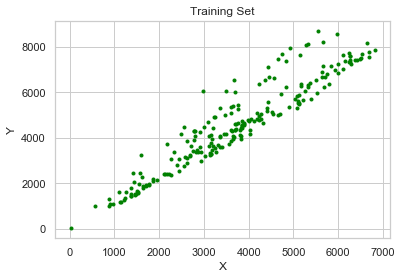

In [13]:
plt.scatter(x_test[:,-1], y_test, color='green', marker='.')
#plt.scatter(x[:,-2], y, color='red', marker='.')
plt.title('Training Set')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Implementation

In [14]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [33]:
def linear_reg_cost(theta, x, y, lambda_, num_of_samples, num_of_features):
    loss = hypothesis(x,theta)-y
    #regularizer = lambda_*np.sum(theta[1:,:]**2)/(2*m)
    return np.sum(loss ** 2)/(2*m) 

# Test Cost Function

In [28]:
m,n = x_test.shape
X = x_train
Y = y_train
X_T = np.transpose(X)
theta = np.dot(np.dot(np.linalg.pinv(np.dot(X_T, X)), X_T), Y)

lambda_= 1
linear_reg_cost(theta, x_train, y_train,lambda_c,m,n)

3.9567073079148894e-17

In [29]:
# Regularized Linear Regresion

In [30]:
def linear_reg_grad(theta_flatten, x_flatten, y, lambda_, num_of_samples, num_of_features):
    x = x_flatten.reshape(num_of_samples, num_of_features)
    m,n = x.shape
    theta = theta_flatten.reshape(n,1)
    new_theta = np.zeros(shape=(theta.shape))
    loss = hypothesis(x,theta)-y
    gradient = np.dot(x.T,loss)
    new_theta[0:,:] = gradient/m
    new_theta[1:,:] = gradient[1:,:]/m + lambda_*(theta[1:,]/m)
    return new_theta.flatten()

In [32]:
theta = np.ones(n)# np.dot(np.dot(np.linalg.pinv(np.dot(X_T, X)), X_T), Y)
lambda_ = 0
grad = linear_reg_grad(theta,x_train.flatten(),y_train,lambda_,m,n)

ValueError: cannot reshape array of size 6132 into shape (220,12)